In [1]:
import ROOT as R
import re
import argparse
from array import array
import os
R.EnableImplicitMT()

Welcome to JupyROOT 6.26/10


### plot functions

In [5]:
def add_lumi(year):
    lowX=0.55
    lowY=0.835
    lumi  = R.TPaveText(lowX, lowY+0.06, lowX+0.30, lowY+0.16, "NDC")
    lumi.SetBorderSize(   0 )
    lumi.SetFillStyle(    0 )
    lumi.SetTextAlign(   12 )
    lumi.SetTextColor(    1 )
    lumi.SetTextSize(0.06)
    lumi.SetTextFont (   42 )
    if (year=="2018"): lumi.AddText("2018, 60 fb^{-1} (13 TeV)")
    if (year=="2017"): lumi.AddText("2017, 41 fb^{-1} (13 TeV)")
    if (year=="2016"): lumi.AddText("2016, 36 fb^{-1} (13 TeV)")
    return lumi

In [6]:
def add_CMS():
    lowX=0.11
    lowY=0.835
    lumi  = R.TPaveText(lowX, lowY+0.06, lowX+0.15, lowY+0.16, "NDC")
    lumi.SetTextFont(61)
    lumi.SetTextSize(0.08)
    lumi.SetBorderSize(   0 )
    lumi.SetFillStyle(    0 )
    lumi.SetTextAlign(   12 )
    lumi.SetTextColor(    1 )
    lumi.AddText("CMS")
    return lumi

In [7]:
def add_Preliminary():
    lowX=0.25
    lowY=0.835
    lumi  = R.TPaveText(lowX, lowY+0.06, lowX+0.15, lowY+0.16, "NDC")
    lumi.SetTextFont(52)
    lumi.SetTextSize(0.06)
    lumi.SetBorderSize(   0 )
    lumi.SetFillStyle(    0 )
    lumi.SetTextAlign(   12 )
    lumi.SetTextColor(    1 )
    lumi.AddText("Preliminary")
    return lumi

In [8]:
def make_legend():
        output = R.TLegend(0.5, 0.65, 0.92, 0.86, "", "brNDC")
        output.SetNColumns(2)
        output.SetLineWidth(0)
        output.SetLineStyle(0)
        output.SetFillStyle(0)
        output.SetBorderSize(0)
        output.SetTextFont(62)
        return output


In [9]:
def make_legend2():
        output = R.TLegend(0.45, 0.6, 0.92, 0.86, "", "brNDC")
        output.SetNColumns(2)
        output.SetLineWidth(0)
        output.SetLineStyle(0)
        output.SetFillStyle(0)
        output.SetBorderSize(0)
        output.SetTextFont(62)
        return output

### basic IO

In [7]:
path = "/gwpool/users/lzhang/private/bbtt/CMS-HHbbtt-boosted-BigN/" + "AK8based_Out_625/"

process_list = ['SMHH', 'DY+Jets50To100', 'DY+Jets100To250', 'DY+Jets250To400', 'DY+Jets400To650', 'DY+Jets650ToInf','VBFH', 'ggFH','TTbarHad', 'TTbarSemi', 'TTbarDiLep']
sample_list = ['SMHH', 'DY+Jets50To100', 'DY+Jets100To250', 'DY+Jets250To400', 'DY+Jets400To650', 'DY+Jets650ToInf','VBFH', 'ggFH','TTbarHad', 'TTbarSemi', 'TTbarDiLep']
DY_list = ['DY+Jets50To100', 'DY+Jets100To250', 'DY+Jets250To400', 'DY+Jets400To650', 'DY+Jets650ToInf']
SH_list = ['VBFH', 'ggFH']
TT_list = ['TTbarHad', 'TTbarSemi', 'TTbarDiLep']

fileset = {}
fileset['SMHH'] = []
fileset['VBFH'] = []
fileset['ggFH'] = []
fileset['DY+Jets50To100'] = []
fileset['DY+Jets100To250'] = []
fileset['DY+Jets250To400'] = []
fileset['DY+Jets400To650'] = []
fileset['DY+Jets650ToInf'] = []
fileset['TTbarHad'] = []
fileset['TTbarSemi'] = []
fileset['TTbarDiLep'] = []
# for process in process_list:
for process in sample_list:
    for file in os.listdir(path+process):
        if file.endswith(".root"):
            fileset[process].append(path+'/'+process+'/'+file)

In [8]:
df_dict_t1 = {}
df_dict_t2 = {}
df_dict_t3 = {}
df_dict_t4 = {}

histo_dict_t1 = {}
histo_dict_t2 = {}
histo_dict_t3 = {}
histo_dict_t4 = {}

In [9]:
interested_variables = {"ak8jets_SoftDropMass","true_weight","ak8jets_Pt","ak8jets_Eta","ak8jets_Mass","ak8jets_probHtt","match_gen_tau","match_gen_hav","match_gen_emu","bParticleNetTauAK8JetTags_probHtt"}
for sample in sample_list:
    df_dict[sample] = R.RDataFrame("ak8tree", fileset[sample], interested_variables)
    df_dict[sample] = df_dict[sample].Filter("abs(ak8jets_Eta)<2.5").Filter("ak8jets_SoftDropMass>30").Filter("ak8jets_Pt>250").Filter("match_gen_tau==2").Filter("match_gen_emu==0")
    # df_dict[sample] = df_dict[sample].Filter("abs(ak8jets_Eta)<2.5").Filter("ak8jets_SoftDropMass>30").Filter("ak8jets_Pt>250").Filter("match_gen_tau==1").Filter("match_gen_emu==0")
    # df_dict[sample] = df_dict[sample].Filter("abs(ak8jets_Eta)<2.5").Filter("ak8jets_SoftDropMass>30").Filter("ak8jets_Pt>250").Filter("match_gen_tau==0").Filter("match_gen_hav>0")#.Filter("match_gen_emu==0")
    # df_dict[sample] = df_dict[sample].Filter("abs(ak8jets_Eta)<2.5").Filter("ak8jets_SoftDropMass>30").Filter("ak8jets_Pt>250").Filter("match_gen_tau==0").Filter("match_gen_hav==0").Filter("match_gen_emu==0")
    

In [10]:
histo_dict['SMHH_ak8jets_SoftDropMass'] = \
    df_dict['SMHH'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_SoftDropMass", "true_weight")

histo_dict['SMHH_ak8jets_Mass'] = \
    df_dict['SMHH'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Mass", "true_weight")

histo_dict['SMHH_ak8jets_probHtt'] = \
    df_dict['SMHH'].Histo1D((" ", " ", 50, 0, 1), "ak8jets_probHtt", "true_weight")

histo_dict['SMHH_bParticleNetTauAK8JetTags_probHtt'] = \
    df_dict['SMHH'].Histo1D((" ", " ", 50, 0, 1), "bParticleNetTauAK8JetTags_probHtt", "true_weight")

histo_dict['SMHH_ak8jets_Pt'] = \
    df_dict['SMHH'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Pt", "true_weight")

In [11]:
for DY_proc in DY_list:
    histo_dict[f'{DY_proc}_ak8jets_SoftDropMass'] = \
    df_dict[f'{DY_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_SoftDropMass", "true_weight")

    histo_dict[f'{DY_proc}_ak8jets_Mass'] = \
    df_dict[f'{DY_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Mass", "true_weight")

    histo_dict[f'{DY_proc}_ak8jets_probHtt'] = \
    df_dict[f'{DY_proc}'].Histo1D((" ", " ", 50, 0, 1), "ak8jets_probHtt", "true_weight")

    histo_dict[f'{DY_proc}_bParticleNetTauAK8JetTags_probHtt'] = \
    df_dict[f'{DY_proc}'].Histo1D((" ", " ", 50, 0, 1), "bParticleNetTauAK8JetTags_probHtt", "true_weight")
    
    histo_dict[f'{DY_proc}_ak8jets_Pt'] = \
    df_dict[f'{DY_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Pt", "true_weight")
    
histo_dict['DY_ak8jets_SoftDropMass'] = histo_dict['DY+Jets50To100_ak8jets_SoftDropMass'].GetPtr()
histo_dict['DY_ak8jets_Mass'] = histo_dict['DY+Jets50To100_ak8jets_Mass'].GetPtr()
histo_dict['DY_ak8jets_probHtt'] = histo_dict['DY+Jets50To100_ak8jets_probHtt'].GetPtr()
histo_dict['DY_bParticleNetTauAK8JetTags_probHtt'] = histo_dict['DY+Jets50To100_bParticleNetTauAK8JetTags_probHtt'].GetPtr()
histo_dict['DY_ak8jets_Pt'] = histo_dict['DY+Jets50To100_ak8jets_Pt'].GetPtr()


for DY_proc in DY_list[1:]:
    histo_dict['DY_ak8jets_SoftDropMass'] = histo_dict['DY_ak8jets_SoftDropMass'] + histo_dict[f'{DY_proc}_ak8jets_SoftDropMass'].GetPtr()
    histo_dict['DY_ak8jets_Mass'] = histo_dict['DY_ak8jets_Mass'] + histo_dict[f'{DY_proc}_ak8jets_Mass'].GetPtr()
    histo_dict['DY_ak8jets_probHtt'] = histo_dict['DY_ak8jets_probHtt'] + histo_dict[f'{DY_proc}_ak8jets_probHtt'].GetPtr()
    histo_dict['DY_bParticleNetTauAK8JetTags_probHtt'] = histo_dict['DY_bParticleNetTauAK8JetTags_probHtt'] + histo_dict[f'{DY_proc}_bParticleNetTauAK8JetTags_probHtt'].GetPtr()
    histo_dict['DY_ak8jets_Pt'] = histo_dict['DY_ak8jets_Pt'] + histo_dict[f'{DY_proc}_ak8jets_Pt'].GetPtr()


In [12]:
for SH_proc in SH_list:
    histo_dict[f'{SH_proc}_ak8jets_SoftDropMass'] = \
    df_dict[f'{SH_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_SoftDropMass", "true_weight")
    
    histo_dict[f'{SH_proc}_ak8jets_Mass'] = \
    df_dict[f'{SH_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Mass", "true_weight")

    histo_dict[f'{SH_proc}_ak8jets_probHtt'] = \
    df_dict[f'{SH_proc}'].Histo1D((" ", " ", 50, 0, 1), "ak8jets_probHtt", "true_weight")

    histo_dict[f'{SH_proc}_bParticleNetTauAK8JetTags_probHtt'] = \
    df_dict[f'{SH_proc}'].Histo1D((" ", " ", 50, 0, 1), "bParticleNetTauAK8JetTags_probHtt", "true_weight")  
    
    histo_dict[f'{SH_proc}_ak8jets_Pt'] = \
    df_dict[f'{SH_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Pt", "true_weight")

In [14]:
for TT_proc in TT_list:
    print(TT_proc)
    histo_dict[f'{TT_proc}_ak8jets_SoftDropMass'] = \
    df_dict[f'{TT_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_SoftDropMass", "true_weight")

    # histo_dict[f'{TT_proc}_ak8jets_Mass'] = \
    # df_dict[f'{TT_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Mass", "true_weight")
    
    histo_dict[f'{TT_proc}_ak8jets_Pt'] = \
    df_dict[f'{TT_proc}'].Histo1D((" ", " ", 40, 0, 400), "ak8jets_Pt", "true_weight")

    histo_dict[f'{TT_proc}_ak8jets_probHtt'] = \
    df_dict[f'{TT_proc}'].Histo1D((" ", " ", 50, 0, 1), "ak8jets_probHtt", "true_weight")

    histo_dict[f'{TT_proc}_bParticleNetTauAK8JetTags_probHtt'] = \
    df_dict[f'{TT_proc}'].Histo1D((" ", " ", 50, 0, 1), "bParticleNetTauAK8JetTags_probHtt", "true_weight")
    
histo_dict['TT_ak8jets_SoftDropMass'] = histo_dict['TTbarHad_ak8jets_SoftDropMass'].GetPtr()
# histo_dict['TT_ak8jets_Mass'] = histo_dict['TTbarHad_ak8jets_Mass'].GetPtr()
histo_dict['TT_ak8jets_Pt'] = histo_dict['TTbarHad_ak8jets_Pt'].GetPtr()
histo_dict['TT_ak8jets_probHtt'] = histo_dict['TTbarHad_ak8jets_probHtt'].GetPtr()
histo_dict['TT_bParticleNetTauAK8JetTags_probHtt'] = histo_dict['TTbarHad_bParticleNetTauAK8JetTags_probHtt'].GetPtr()


for TT_proc in TT_list[1:]:
    print(TT_proc)
    histo_dict['TT_ak8jets_SoftDropMass'] = histo_dict['TT_ak8jets_SoftDropMass'] + histo_dict[f'{TT_proc}_ak8jets_SoftDropMass'].GetPtr()
    # histo_dict['TT_ak8jets_Mass'] = histo_dict['TT_ak8jets_Mass'] + histo_dict[f'{TT_proc}_ak8jets_Mass'].GetPtr()
    histo_dict['TT_ak8jets_Pt'] = histo_dict['TT_ak8jets_Pt'] + histo_dict[f'{TT_proc}_ak8jets_Pt'].GetPtr()
    histo_dict['TT_ak8jets_probHtt'] = histo_dict['TT_ak8jets_probHtt'] + histo_dict[f'{TT_proc}_ak8jets_probHtt'].GetPtr()
    histo_dict['TT_bParticleNetTauAK8JetTags_probHtt'] = histo_dict['TT_bParticleNetTauAK8JetTags_probHtt'] + histo_dict[f'{TT_proc}_bParticleNetTauAK8JetTags_probHtt'].GetPtr()
    

TTbarHad
TTbarSemi
TTbarDiLep
TTbarSemi
TTbarDiLep


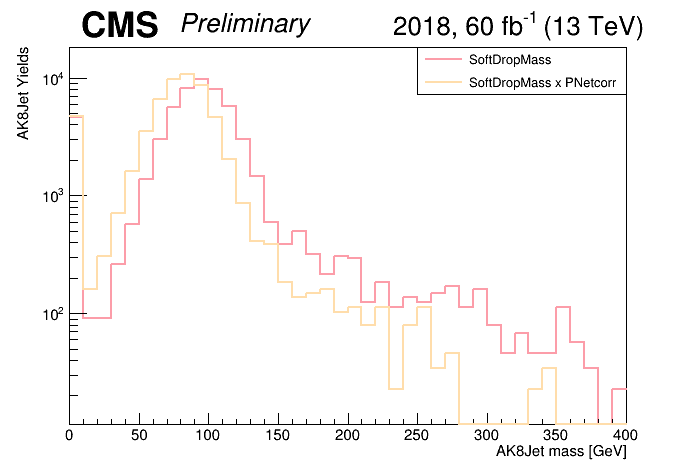

In [134]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
histo_dict['SMHH_ak8jets_SoftDropMass'].SetLineWidth(2)
histo_dict['SMHH_ak8jets_SoftDropMass'].SetLineColorAlpha(R.TColor.GetColor("#FC9DA9"),1.0)
histo_dict['SMHH_ak8jets_SoftDropMass'].Draw('histo')

histo_dict['SMHH_ak8jets_SoftDropMass'].GetXaxis().SetTitle("AK8Jet mass [GeV]")
histo_dict['SMHH_ak8jets_SoftDropMass'].GetYaxis().SetTitle("AK8Jet Yields")


histo_dict['SMHH_ak8jets_Mass'].SetLineWidth(2)
histo_dict['SMHH_ak8jets_Mass'].SetLineColorAlpha(R.TColor.GetColor("#FFDDAB"),1.0)
histo_dict['SMHH_ak8jets_Mass'].Draw('histo same')

leg = R.TLegend(0.60,0.80,0.90,0.90)
leg.AddEntry(histo_dict['SMHH_ak8jets_SoftDropMass'].GetPtr(), "SoftDropMass", "l")
leg.AddEntry(histo_dict['SMHH_ak8jets_Mass'].GetPtr(), "SoftDropMass x PNetcorr", "l")
leg.Draw('same')
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
c.SetLogy()
c.Draw()

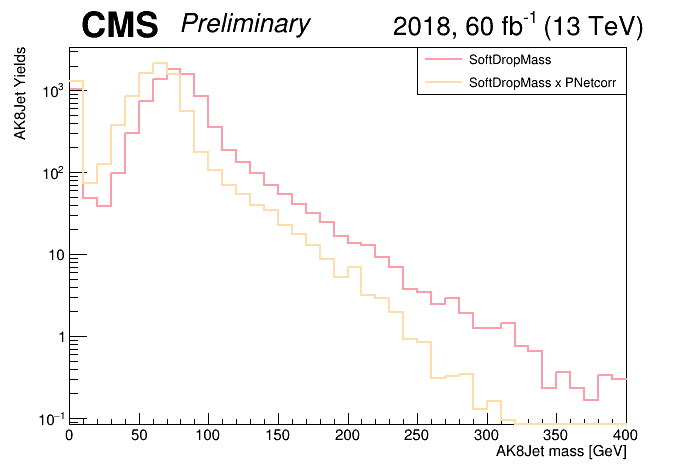

In [138]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
histo_dict['DY_ak8jets_SoftDropMass'].SetLineWidth(2)
histo_dict['DY_ak8jets_SoftDropMass'].SetLineColorAlpha(R.TColor.GetColor("#FC9DA9"),1.0)
histo_dict['DY_ak8jets_SoftDropMass'].Draw('histo')

histo_dict['DY_ak8jets_SoftDropMass'].GetXaxis().SetTitle("AK8Jet mass [GeV]")
histo_dict['DY_ak8jets_SoftDropMass'].GetYaxis().SetTitle("AK8Jet Yields")


histo_dict['DY_ak8jets_Mass'].SetLineWidth(2)
histo_dict['DY_ak8jets_Mass'].SetLineColorAlpha(R.TColor.GetColor("#FFDDAB"),1.0)
histo_dict['DY_ak8jets_Mass'].Draw('histo same')

leg = R.TLegend(0.60,0.80,0.90,0.90)
leg.AddEntry(histo_dict['DY_ak8jets_SoftDropMass'], "SoftDropMass", "l")
leg.AddEntry(histo_dict['DY_ak8jets_Mass'], "SoftDropMass x PNetcorr", "l")
leg.Draw('same')
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
c.SetLogy()
c.Draw()

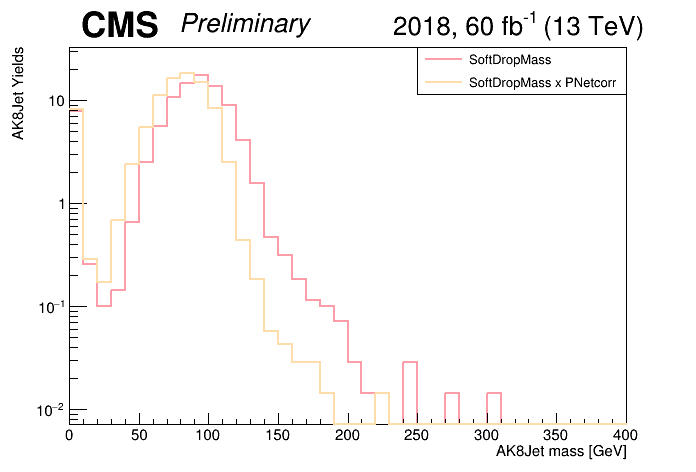

In [148]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
histo_dict['ggFH_ak8jets_SoftDropMass'].SetLineWidth(2)
histo_dict['ggFH_ak8jets_SoftDropMass'].SetLineColorAlpha(R.TColor.GetColor("#FC9DA9"),1.0)
histo_dict['ggFH_ak8jets_SoftDropMass'].Draw('histo')

histo_dict['ggFH_ak8jets_SoftDropMass'].GetXaxis().SetTitle("AK8Jet mass [GeV]")
histo_dict['ggFH_ak8jets_SoftDropMass'].GetYaxis().SetTitle("AK8Jet Yields")


histo_dict['ggFH_ak8jets_Mass'].SetLineWidth(2)
histo_dict['ggFH_ak8jets_Mass'].SetLineColorAlpha(R.TColor.GetColor("#FFDDAB"),1.0)
histo_dict['ggFH_ak8jets_Mass'].Draw('histo same')

leg = R.TLegend(0.60,0.80,0.90,0.90)
leg.AddEntry(histo_dict['ggFH_ak8jets_SoftDropMass'].GetPtr(), "SoftDropMass", "l")
leg.AddEntry(histo_dict['ggFH_ak8jets_Mass'].GetPtr(), "SoftDropMass x PNetcorr", "l")
leg.Draw('same')
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
c.SetLogy()
c.Draw()

In [15]:
stack=R.THStack("stack"," ")
histo_dict['ggFH_ak8jets_SoftDropMass'].SetFillColorAlpha(R.TColor.GetColor('#731512'),0.9)
stack.Add(histo_dict['ggFH_ak8jets_SoftDropMass'].GetPtr())
histo_dict['VBFH_ak8jets_SoftDropMass'].SetFillColorAlpha(R.TColor.GetColor('#D05426'),0.9)
stack.Add(histo_dict['VBFH_ak8jets_SoftDropMass'].GetPtr())
histo_dict['DY_ak8jets_SoftDropMass'].SetFillColorAlpha(R.TColor.GetColor('#F4E85E'),0.9)
stack.Add(histo_dict['DY_ak8jets_SoftDropMass'])
histo_dict['TT_ak8jets_SoftDropMass'].SetFillColorAlpha(R.TColor.GetColor('#322E95'),0.9)
stack.Add(histo_dict['TT_ak8jets_SoftDropMass'])

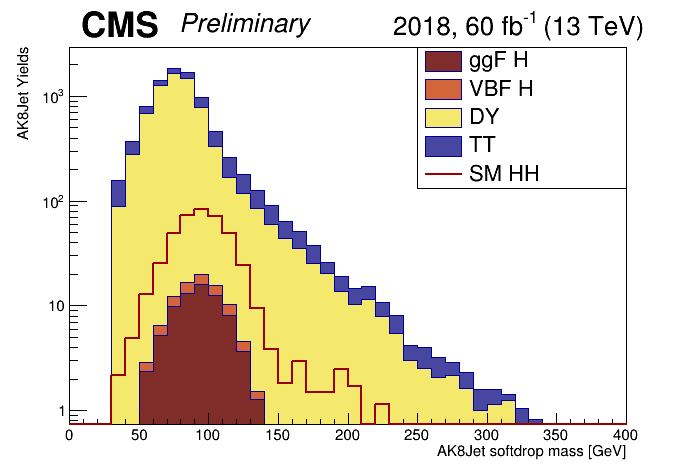

In [16]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
stack.Draw('histo')
stack.GetXaxis().SetTitle("AK8Jet softdrop mass [GeV]")
stack.GetYaxis().SetTitle("AK8Jet Yields")


histo_dict['SMHH_ak8jets_SoftDropMass'].SetLineWidth(2)
histo_dict['SMHH_ak8jets_SoftDropMass'].SetLineColorAlpha(R.TColor.GetColor("#950008"),1.0)
histo_dict['SMHH_ak8jets_SoftDropMass'].Scale(0.01)
histo_dict['SMHH_ak8jets_SoftDropMass'].Draw('histo same')

leg = R.TLegend(0.60,0.60,0.90,0.90)
leg.AddEntry(histo_dict['ggFH_ak8jets_SoftDropMass'].GetPtr(), "ggF H", "f")
leg.AddEntry(histo_dict['VBFH_ak8jets_SoftDropMass'].GetPtr(), "VBF H", "f")
leg.AddEntry(histo_dict['DY_ak8jets_SoftDropMass'], "DY", "f")
leg.AddEntry(histo_dict['TT_ak8jets_SoftDropMass'], "TT", "f")
leg.AddEntry(histo_dict['SMHH_ak8jets_SoftDropMass'].GetPtr(), "SM HH", "l")
leg.Draw('same')
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
c.SetLogy()
c.Draw()

In [17]:
stack=R.THStack("stack"," ")
histo_dict['ggFH_bParticleNetTauAK8JetTags_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#731512'),0.9)
stack.Add(histo_dict['ggFH_bParticleNetTauAK8JetTags_probHtt'].GetPtr())
histo_dict['VBFH_bParticleNetTauAK8JetTags_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#D05426'),0.9)
stack.Add(histo_dict['VBFH_bParticleNetTauAK8JetTags_probHtt'].GetPtr())
histo_dict['DY_bParticleNetTauAK8JetTags_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#F4E85E'),0.9)
stack.Add(histo_dict['DY_bParticleNetTauAK8JetTags_probHtt'])
histo_dict['TT_bParticleNetTauAK8JetTags_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#322E95'),0.9)
stack.Add(histo_dict['TT_bParticleNetTauAK8JetTags_probHtt'])

In [ ]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
stack.Draw('histo')
stack.GetXaxis().SetTitle("ParticleNetTauAK8JetTags probHtt")
stack.GetYaxis().SetTitle("AK8Jet Yields")

histo_dict['SMHH_bParticleNetTauAK8JetTags_probHtt'].SetLineWidth(2)
histo_dict['SMHH_bParticleNetTauAK8JetTags_probHtt'].SetLineColorAlpha(R.TColor.GetColor("#950008"),1.0)
histo_dict['SMHH_bParticleNetTauAK8JetTags_probHtt'].Scale(0.01)
histo_dict['SMHH_bParticleNetTauAK8JetTags_probHtt'].Draw('histo same')

leg = R.TLegend(0.40,0.60,0.70,0.90)
leg.AddEntry(histo_dict['ggFH_bParticleNetTauAK8JetTags_probHtt'].GetPtr(), "ggF H", "f")
leg.AddEntry(histo_dict['VBFH_bParticleNetTauAK8JetTags_probHtt'].GetPtr(), "VBF H", "f")
leg.AddEntry(histo_dict['DY_bParticleNetTauAK8JetTags_probHtt'], "DY", "f")
leg.AddEntry(histo_dict['TT_bParticleNetTauAK8JetTags_probHtt'], "TT", "f")
leg.AddEntry(histo_dict['SMHH_bParticleNetTauAK8JetTags_probHtt'].GetPtr(), "SM HH", "l")
leg.Draw('same')
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
c.SetLogy()
c.Draw()

In [183]:
stack=R.THStack("stack"," ")
histo_dict['ggFH_ak8jets_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#731512'),0.9)
stack.Add(histo_dict['ggFH_ak8jets_probHtt'].GetPtr())
histo_dict['VBFH_ak8jets_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#D05426'),0.9)
stack.Add(histo_dict['VBFH_ak8jets_probHtt'].GetPtr())
histo_dict['DY_ak8jets_probHtt'].SetFillColorAlpha(R.TColor.GetColor('#F4E85E'),0.9)
stack.Add(histo_dict['DY_ak8jets_probHtt'])

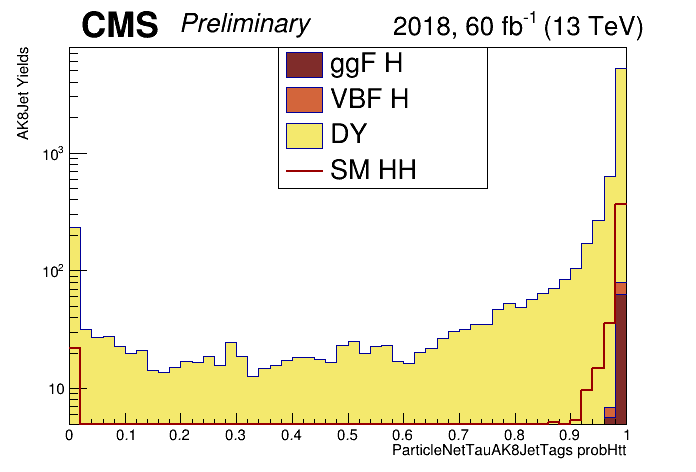

In [187]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
stack.Draw('histo')
stack.GetXaxis().SetTitle("ParticleNetTauAK8JetTags probHtt")
stack.GetYaxis().SetTitle("AK8Jet Yields")

histo_dict['SMHH_ak8jets_probHtt'].SetLineWidth(2)
histo_dict['SMHH_ak8jets_probHtt'].SetLineColorAlpha(R.TColor.GetColor("#950008"),1.0)
# histo_dict['SMHH_ak8jets_probHtt'].Scale(0.1)
histo_dict['SMHH_ak8jets_probHtt'].Draw('histo same')

leg = R.TLegend(0.40,0.60,0.70,0.90)
leg.AddEntry(histo_dict['ggFH_ak8jets_probHtt'].GetPtr(), "ggF H", "f")
leg.AddEntry(histo_dict['VBFH_ak8jets_probHtt'].GetPtr(), "VBF H", "f")
leg.AddEntry(histo_dict['DY_ak8jets_probHtt'], "DY", "f")
leg.AddEntry(histo_dict['SMHH_ak8jets_probHtt'].GetPtr(), "SM HH", "l")
leg.Draw('same')
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
c.SetLogy()
c.Draw()

In [2]:
x = [0, 1, 2, 3, 4, 5, 6]

name = ['pT[250, Inf]', 'pT[250, 350]', 'pT[350, 500]', 'pT[500, 750]', 'pT[750, 1000]', 'pT[1000, Inf]', 'mass [60, 130]']

y1 = {'T1': [10485.10895164,  7089.14463805,  2559.1207047 ,   705.05403701,
         102.39608081,    29.39349107,  8196.70895675], 'T2': [158667.7895058 , 105499.98704731,  41169.64075113,  10424.81179548,
         1275.10467102,    298.24524085, 108867.88929589], 'T3': [3147413.40908895, 2022123.10024223,  859914.37355634,
        232969.51046718,   26685.0255971 ,    5721.39922609,
       2224618.70675172], 'T4': [1303336.51144189,  930259.82781305,  288483.07846473,
         71572.06621985,   10243.05649137,    2778.48245289,
        927959.99962913]}

y2 = {'T1': [7379.3123122 , 5497.17963221, 1566.68607467,  266.68291633,
         36.36536718,   12.39832181, 6345.73117773], 'T2': [100409.44770513,  70814.98108995,  23931.57894437,   5036.1354954 ,
          511.74890863,    115.00326678,  81678.9326999 ], 'T3': [2.00185256e+06, 1.36769824e+06, 5.01759819e+05, 1.18355365e+05,
       1.20490511e+04, 1.99008426e+03, 1.64464148e+06], 'T4': [717227.87459907, 546050.64972992, 141360.45782342,  25447.80225625,
         3486.04567476,    882.91911471, 642582.9049296 ]}

In [3]:
import numpy as np
x = np.array(x, dtype=np.float64)
y1_T1 = np.array(y1['T1'], dtype=np.float64)
y1_T2 = np.array(y1['T2'], dtype=np.float64)
y1_T3 = np.array(y1['T3'], dtype=np.float64)
y1_T4 = np.array(y1['T4'], dtype=np.float64)

y2_T1 = np.array(y2['T1'], dtype=np.float64)
y2_T2 = np.array(y2['T2'], dtype=np.float64)
y2_T3 = np.array(y2['T3'], dtype=np.float64)
y2_T4 = np.array(y2['T4'], dtype=np.float64)

eff_T1 = y2_T1/y1_T1
eff_T2 = y2_T2/y1_T2
eff_T3 = y2_T3/y1_T3
eff_T4 = y2_T4/y1_T4

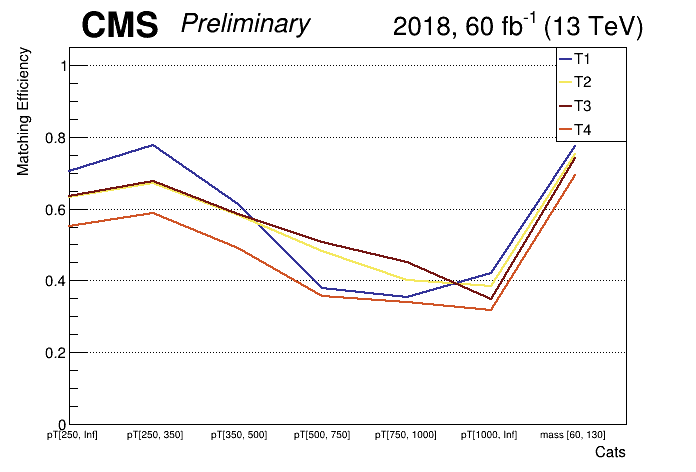

In [13]:
gr_match_eff = {}
gr_match_eff['T1'] = R.TGraph(len(x), x, eff_T1)
gr_match_eff['T2'] = R.TGraph(len(x), x, eff_T2)
gr_match_eff['T3'] = R.TGraph(len(x), x, eff_T3)
gr_match_eff['T4'] = R.TGraph(len(x), x, eff_T4)

c = R.TCanvas()
R.gStyle.SetOptStat(0000)
# c.SetLogy()
c.SetGridy()
gr_match_eff['T1'].SetLineColorAlpha(R.TColor.GetColor("#322E95"),1.0)
gr_match_eff['T2'].SetLineColorAlpha(R.TColor.GetColor("#F4E85E"),1.0)
gr_match_eff['T3'].SetLineColorAlpha(R.TColor.GetColor("#731512"),1.0)
gr_match_eff['T4'].SetLineColorAlpha(R.TColor.GetColor("#D05426"),1.0)
gr_match_eff['T1'].SetMarkerColorAlpha(R.TColor.GetColor("#322E95"),1.0)
gr_match_eff['T2'].SetMarkerColorAlpha(R.TColor.GetColor("#F4E85E"),1.0)
gr_match_eff['T3'].SetMarkerColorAlpha(R.TColor.GetColor("#731512"),1.0)
gr_match_eff['T4'].SetMarkerColorAlpha(R.TColor.GetColor("#D05426"),1.0)
gr_match_eff['T1'].SetLineWidth(2)
gr_match_eff['T2'].SetLineWidth(2)
gr_match_eff['T3'].SetLineWidth(2)
gr_match_eff['T4'].SetLineWidth(2)
gr_match_eff['T1'].SetMarkerSize(2)
gr_match_eff['T2'].SetMarkerSize(2)
gr_match_eff['T3'].SetMarkerSize(2)
gr_match_eff['T4'].SetMarkerSize(2)

c.SetTitle(" ")
gr_match_eff['T1'].SetName(" ")
gr_match_eff['T1'].SetTitle(" ")

gr_match_eff['T1'].GetXaxis().SetTitle("Cats")
for i in x:
    bin_index = gr_match_eff['T1'].GetXaxis().FindBin(i)
    gr_match_eff['T1'].GetXaxis().SetBinLabel(bin_index, name[round(i)])
    
gr_match_eff['T1'].GetXaxis().LabelsOption('h')

gr_match_eff['T1'].GetYaxis().SetTitle("Matching Efficiency")

gr_match_eff['T1'].GetYaxis().SetRangeUser(0, 1.05)

gr_match_eff['T1'].Draw("APL")
gr_match_eff['T2'].Draw("PLSAME")
gr_match_eff['T3'].Draw("PLSAME")
gr_match_eff['T4'].Draw("PLSAME")

leg = R.TLegend(0.80,0.70,0.90,0.90)
leg.AddEntry(gr_match_eff['T1'], "T1", "PL")
leg.AddEntry(gr_match_eff['T2'], "T2", "PL")
leg.AddEntry(gr_match_eff['T3'], "T3", "PL")
leg.AddEntry(gr_match_eff['T4'], "T4", "PL")
leg.Draw("same")
l1=add_lumi('2018')
l1.Draw("same")
l2=add_CMS()
l2.Draw("same")
l3=add_Preliminary()
l3.Draw("same")
# c.SaveAs('match_eff.pdf')
# c.SaveAs('match_eff.png')
c.Draw()

In [ ]:
SetTitle